In [1]:
import os
import soundfile
import librosa as lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Audio, display

In [3]:
catalogue = pd.DataFrame(columns=['filepath', 'dataset', 'speaker', 'sex', 'age', 'emotion'])
base_directory = r'./datasets/'
speaker_id = 1

In [38]:
directory = base_directory + 'CREMA-D/'
actors_data = pd.read_csv(base_directory + 'CREMA-D-actors-info.csv', sep=',')
emotion_dict = {
    'ANG': 'anger',
    'DIS': 'disgust',
    'FEA': 'fear',
    'HAP': 'happiness',
    'NEU': 'neutral',
    'SAD': 'sadness'
}
speaker_dict = { }

for filename in os.listdir(directory):
    if filename == 'desktop.ini':
        continue
    filepath = directory + filename
    
    actor_id = int(filename[:4])
    
    if actor_id not in speaker_dict:
        speaker_dict[actor_id] = speaker_id
        speaker_id += 1
    
    actor_info = actors_data[actors_data['ActorID'] == actor_id]
    sex = actor_info['Sex'].values[0].lower()
    age = actor_info['Age'].values[0]
        
    emotion_str = filename[9:12]
    emotion = emotion_dict[emotion_str]
    speaker = speaker_dict[actor_id]
    
    row = {
        'filepath': filepath,
        'dataset': 'CREMA-D',
        'speaker': speaker,
        'sex': sex,
        'age': 'young' if age < 50 else 'old',
        'emotion': emotion
    }
    catalogue = catalogue.append(row, ignore_index=True)

In [39]:
directory = base_directory + 'RAVDESS/'
emotion_dict = {
    '01': 'neutral',
    '03': 'happiness',
    '04': 'sadness',
    '05': 'anger',
    '06': 'fear',
    '07': 'disgust',
    '08': 'surprise'
}
speaker_dict = { }

for filename in os.listdir(directory):
    if filename == 'desktop.ini':
        continue
    filepath = directory + filename  
    
    emotion_str = filename[6:8]
    if emotion_str == '02':
        continue
    
    actor_id = int(filename[18:20])
    
    if actor_id not in speaker_dict:
        speaker_dict[actor_id] = speaker_id
        speaker_id += 1
    
    sex = 'male' if actor_id % 2 == 1 else 'female'
    emotion = emotion_dict[emotion_str]
    speaker = speaker_dict[actor_id]
    
    row = {
        'filepath': filepath,
        'dataset': 'RAVDESS',
        'speaker': speaker,
        'sex': sex,
        'age': 'young',
        'emotion': emotion
    }
    catalogue = catalogue.append(row, ignore_index=True)

In [40]:
directory = base_directory + 'SAVEE/'
emotion_dict = {
    'a': 'anger',
    'd': 'disgust',
    'f': 'fear',
    'h': 'happiness',
    'n': 'neutral',
    'sa': 'sadness',
    'su': 'surprise'
}
speaker_dict = { }

for filename in os.listdir(directory):
    if filename == 'desktop.ini':
        continue
    filepath = directory + filename
    
    actor_id = filename[-6:-4]
    
    if actor_id not in speaker_dict:
        speaker_dict[actor_id] = speaker_id
        speaker_id += 1
    
    emotion_str = filename[:-9]
    emotion = emotion_dict[emotion_str]
    speaker = speaker_dict[actor_id]
    
    row = {
        'filepath': filepath,
        'dataset': 'SAVEE',
        'speaker': speaker,
        'sex': 'male',
        'age': 'young',
        'emotion': emotion
    }
    catalogue = catalogue.append(row, ignore_index=True)

In [41]:
directory = base_directory + 'TESS/'
emotion_dict = {
    'angry': 'anger',
    'disgust': 'disgust',
    'fear': 'fear',
    'happy': 'happiness',
    'ps': 'surprise',
    'sad': 'sadness',
    'neutral': 'neutral'
}
speaker_dict = { }

for filename in os.listdir(directory):
    if filename == 'desktop.ini':
        continue
    filepath = directory + filename
    
    strings = filename.split('_')
    actor = strings[0]
    
    if actor not in speaker_dict:
        speaker_dict[actor] = speaker_id
        speaker_id += 1
    
    age = 'old' if actor == 'OAF' else 'young'    
    emotion_str = strings[2][:-4]    
    emotion = emotion_dict[emotion_str]
    speaker = speaker_dict[actor]
    
    row = {
        'filepath': filepath,
        'dataset': 'TESS',
        'speaker': speaker,
        'sex': 'female',
        'age': age,
        'emotion': emotion
    }
    catalogue = catalogue.append(row, ignore_index=True)

In [42]:
directory = base_directory + 'eNTERFACE/'
emotion_dict = {
    'an': 'anger',
    'di': 'disgust',
    'fe': 'fear',
    'ha': 'happiness',
    'sa': 'sadness',
    'su': 'surprise'
}
speaker_dict = { }
females = [ 's4', 's5', 's7', 's26', 's28', 's29', 's31', 's33', 's44' ]

for filename in os.listdir(directory):
    if filename == 'desktop.ini':
        continue
    filepath = directory + filename
    name = os.path.splitext(filename)[0]
    
    strings = name.split('_')
    subject = strings[0]
    
    if subject not in speaker_dict:
        speaker_dict[subject] = speaker_id
        speaker_id += 1
    
    emotion_str = strings[1]
    emotion = emotion_dict[emotion_str]
    speaker = speaker_dict[subject]
    sex = 'female' if subject in females else 'male'
    
    row = {
        'filepath': filepath,
        'dataset': 'eNTERFACE',
        'speaker': speaker,
        'sex': sex,
        'age': 'unknown',
        'emotion': emotion
    }
    catalogue = catalogue.append(row, ignore_index=True)

In [68]:
catalogue

,id,filepath,dataset,speaker,sex,age,emotion,augmentation,original_id
0,0,./datasets/CREMA-D/1041_IEO_SAD_LO.wav,CREMA-D,1,male,young,sadness,no,-1
1,1,./datasets/CREMA-D/1063_IEO_ANG_HI.wav,CREMA-D,2,female,young,anger,no,-1
2,2,./datasets/CREMA-D/1005_IEO_FEA_HI.wav,CREMA-D,3,male,young,fear,no,-1
3,3,./datasets/CREMA-D/1060_IOM_NEU_XX.wav,CREMA-D,4,female,young,neutral,no,-1
4,4,./datasets/CREMA-D/1077_TSI_DIS_XX.wav,CREMA-D,5,male,young,disgust,no,-1
...,...,...,...,...,...,...,...,...,...
13252,13257,./datasets/eNTERFACE/s18_di_1.wav,eNTERFACE,126,male,unknown,disgust,no,-1
13253,13258,./datasets/eNTERFACE/s3_sa_1.wav,eNTERFACE,154,male,unknown,sadness,no,-1
13254,13259,./datasets/eNTERFACE/s8_di_2.wav,eNTERFACE,159,male,unknown,disgust,no,-1
13255,13260,./datasets/eNTERFACE/s7_di_1.wav,eNTERFACE,141,female,unknown,disgust,no,-1


In [73]:
catalogue.to_csv('./data_catalogue.csv', sep=';', header=True, index=False)

In [2]:
catalogue = pd.read_csv('./data_catalogue.csv', sep=';')

In [3]:
catalogue = catalogue[catalogue['augmentation'] == 'no']

In [12]:
def fast_histogram(column, title, xlabel, display_labels = None, narrow = False):
    plt.rcParams.update({'font.size': 10})
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 0.5 if narrow == True else 1, 1])
    values = []
    labels = column.unique()
    if display_labels == None:
        display_labels = labels
    for label in labels:
        values.append(len(column[column == label]))
    ax.bar(display_labels, values)
    ax.set_title(title, fontsize=15)
    ax.set_ylabel('liczba nagrań', fontsize=15)
    ax.set_xlabel(xlabel, fontsize=15)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    plt.show()

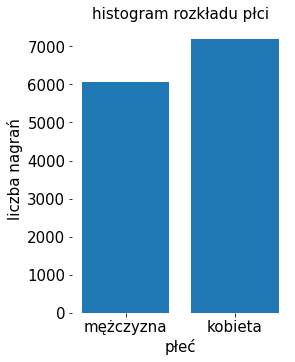

In [7]:
fast_histogram(catalogue['sex'], 'histogram rozkładu płci', 'płeć', ['mężczyzna', 'kobieta'], True)

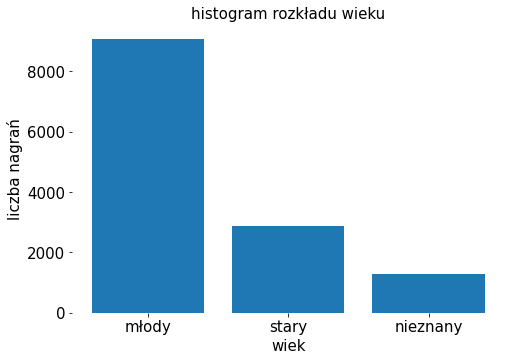

In [9]:
fast_histogram(catalogue['age'], 'histogram rozkładu wieku', 'wiek', ['młody', 'stary', 'nieznany'])

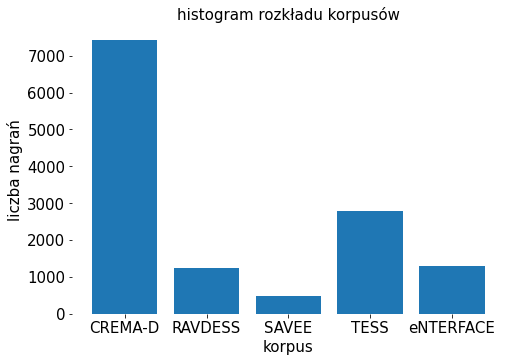

In [10]:
fast_histogram(catalogue['dataset'], 'histogram rozkładu korpusów', 'korpus')

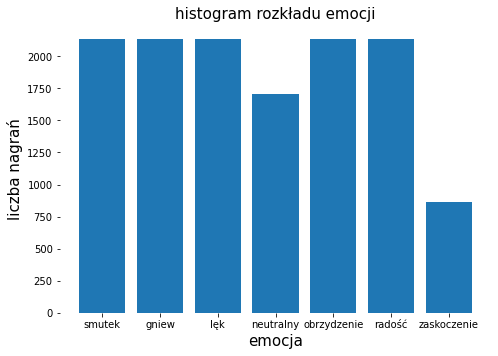

In [13]:
fast_histogram(catalogue['emotion'], 'histogram rozkładu emocji', 'emocja', ['smutek', 'gniew', 'lęk', 'neutralny', 'obrzydzenie', 'radość', 'zaskoczenie'])

In [73]:
def trim(audio, percentage):
    absolute = np.abs(audio)
    threshold = (absolute.max() - absolute.min()) * percentage / 100
    for start, sample in enumerate(absolute):
        if sample > threshold:
            break
    for end, sample in reversed(list(enumerate(absolute))):
        if sample > threshold:
            break
    audio = audio[start:end]
    return audio

In [74]:
durations = []
for index, row in catalogue.iterrows():
    audio, sample_rate = lib.load(row['filepath'])
    audio = trim(audio, 5)
    duration = lib.get_duration(audio, sample_rate)
    durations.append(duration)

In [75]:
np.save('durations.npy', np.asarray(durations))

In [14]:
durations = np.load('durations.npy')

In [44]:
corrupted = []
for index, duration in enumerate(durations):
    if duration > 10:
        corrupted.append(index)

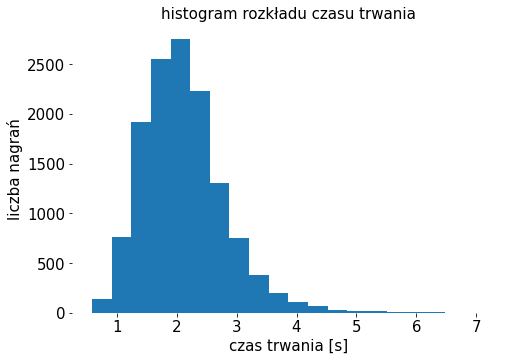

In [15]:
plt.rcParams.update({'font.size': 15})
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.hist(durations, 20)
ax.set_xlabel('czas trwania [s]', fontsize=15)
ax.set_ylabel('liczba nagrań', fontsize=15)
ax.set_title ('histogram rozkładu czasu trwania', fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

# DATA AUGMENTATION

In [4]:
catalogue['augmentation'] = 'no'

In [8]:
catalogue['original_id'] = -1

In [44]:
catalogue = catalogue[catalogue['augmentation'] == 'no']

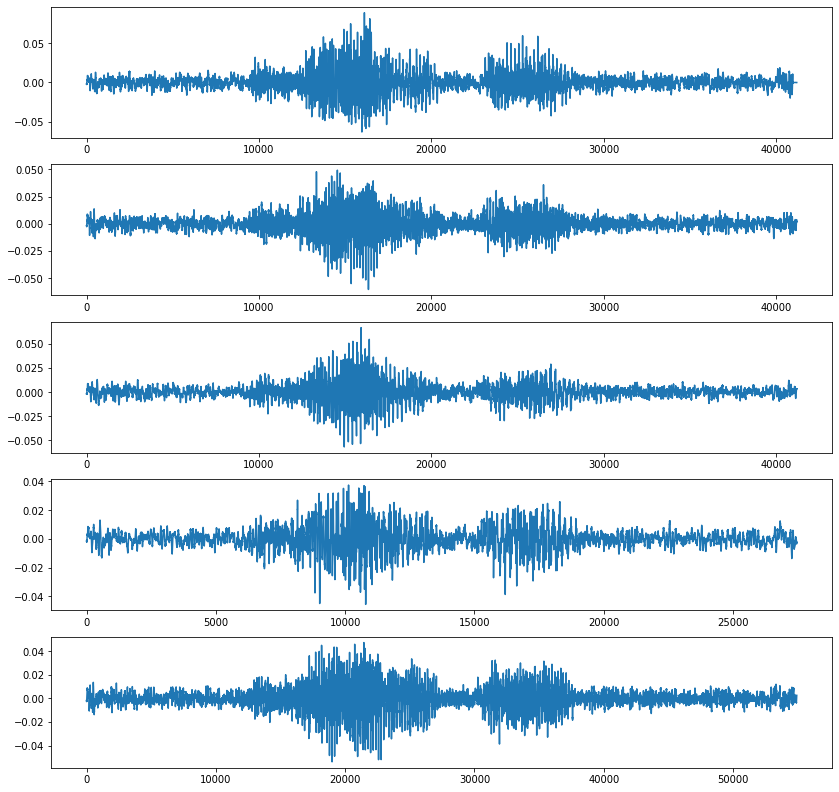

In [34]:
audio, sample_rate = lib.load('./datasets/CREMA-D/1041_IEO_SAD_LO.wav')
modified1 = lib.effects.pitch_shift(audio, sample_rate, n_steps=3)
modified2 = lib.effects.pitch_shift(audio, sample_rate, n_steps=-3)
modified3 = lib.effects.time_stretch(audio, 1.5)
modified4 = lib.effects.time_stretch(audio, 0.75)

fig, ax = plt.subplots(5, figsize=(14, 14))
ax[0].plot(audio)
ax[1].plot(modified1)
ax[2].plot(modified2)
ax[3].plot(modified3)
ax[4].plot(modified4)

plt.show()

display(Audio(audio, rate=sample_rate))
display(Audio(modified1, rate=sample_rate))
display(Audio(modified2, rate=sample_rate))
display(Audio(modified3, rate=sample_rate))
display(Audio(modified4, rate=sample_rate))

In [70]:
original_data = catalogue[(catalogue['augmentation'] == 'no')]

for index, row in original_data.iterrows():
    name, extension = os.path.splitext(os.path.basename(row['filepath']))
    audio, sample_rate = lib.load(row['filepath'])
    directory_path = './datasets/augmentation/' + row['dataset'] + '/'
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)
    
    filepath1 = directory_path + name + '_pitch_shift_up' + extension
    if filepath1 not in catalogue['filepath']:
        modified1 = lib.effects.pitch_shift(audio, sample_rate, n_steps=-3)
        soundfile.write(filepath1, modified1, sample_rate)
        new_row1 = {
            'id': catalogue.shape[0],
            'filepath': filepath1,
            'dataset': row['dataset'],
            'speaker': row['speaker'],
            'sex': row['sex'],
            'age': row['age'],
            'emotion': row['emotion'],
            'augmentation': 'pitch_shift',
            'original_id': row['id']
        }
        catalogue = catalogue.append(new_row1, ignore_index=True)
    
    filepath2 = directory_path + name + '_pitch_shift_down' + extension
    if filepath2 not in catalogue['filepath']:
        modified2 = lib.effects.pitch_shift(audio, sample_rate, n_steps=3)
        soundfile.write(filepath2, modified2, sample_rate)
        new_row2 = {
            'id': catalogue.shape[0],
            'filepath': filepath2,
            'dataset': row['dataset'],
            'speaker': row['speaker'],
            'sex': row['sex'],
            'age': row['age'],
            'emotion': row['emotion'],
            'augmentation': 'pitch_shift',
            'original_id': row['id']
        }
        catalogue = catalogue.append(new_row2, ignore_index=True)

In [71]:
original_data = catalogue[(catalogue['augmentation'] == 'no')]

for index, row in original_data.iterrows():
    name, extension = os.path.splitext(os.path.basename(row['filepath']))
    audio, sample_rate = lib.load(row['filepath'])
    directory_path = './datasets/augmentation/' + row['dataset'] + '/'
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)
    
    filepath3 = directory_path + name + '_' + '_time_stretch_fast' + extension
    if filepath3 not in catalogue['filepath']:
        modified3 = lib.effects.time_stretch(audio, 1.25)
        soundfile.write(filepath3, modified3, sample_rate)
        new_row3 = {
            'id': catalogue.shape[0],
            'filepath': filepath3,
            'dataset': row['dataset'],
            'speaker': row['speaker'],
            'sex': row['sex'],
            'age': row['age'],
            'emotion': row['emotion'],
            'augmentation': 'time_stretch',
            'original_id': row['id']
        }
        catalogue = catalogue.append(new_row3, ignore_index=True)
        
    filepath4 = directory_path + name + '_' + '_time_stretch_slow' + extension
    if filepath4 not in catalogue['filepath']:
        modified4 = lib.effects.time_stretch(audio, 0.75)
        soundfile.write(filepath4, modified4, sample_rate)
        new_row4 = {
            'id': catalogue.shape[0],
            'filepath': filepath4,
            'dataset': row['dataset'],
            'speaker': row['speaker'],
            'sex': row['sex'],
            'age': row['age'],
            'emotion': row['emotion'],
            'augmentation': 'time_stretch',
            'original_id': row['id']
        }
        catalogue = catalogue.append(new_row4, ignore_index=True)

In [72]:
catalogue

,id,filepath,dataset,speaker,sex,age,emotion,augmentation,original_id
0,0,./datasets/CREMA-D/1041_IEO_SAD_LO.wav,CREMA-D,1,male,young,sadness,no,-1
1,1,./datasets/CREMA-D/1063_IEO_ANG_HI.wav,CREMA-D,2,female,young,anger,no,-1
2,2,./datasets/CREMA-D/1005_IEO_FEA_HI.wav,CREMA-D,3,male,young,fear,no,-1
3,3,./datasets/CREMA-D/1060_IOM_NEU_XX.wav,CREMA-D,4,female,young,neutral,no,-1
4,4,./datasets/CREMA-D/1077_TSI_DIS_XX.wav,CREMA-D,5,male,young,disgust,no,-1
...,...,...,...,...,...,...,...,...,...
66275,66275,./datasets/augmentation/eNTERFACE/s8_di_2__tim...,eNTERFACE,159,male,unknown,disgust,time_stretch,13259
66276,66276,./datasets/augmentation/eNTERFACE/s7_di_1__tim...,eNTERFACE,141,female,unknown,disgust,time_stretch,13260
66277,66277,./datasets/augmentation/eNTERFACE/s7_di_1__tim...,eNTERFACE,141,female,unknown,disgust,time_stretch,13260
66278,66278,./datasets/augmentation/eNTERFACE/s17_fe_5__ti...,eNTERFACE,153,male,unknown,fear,time_stretch,13261
